In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

In [80]:
df=pd.read_excel("500MM.xlsx")

In [81]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,PETROBRAS,47855158,21.938,1.0756,52.484
1,PETROBRAS DISTRIBUIDORA,13531695,10.528,1.2175,54.189
2,TELEMAR,7696136,7.836,0.4218,55.977


In [82]:
variaveis = ["Vendas", "Rentabilidade", "Liquidezgeral", "Endividamentogeral"]

In [83]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [84]:
z_variaveis

['z_Vendas', 'z_Rentabilidade', 'z_Liquidezgeral', 'z_Endividamentogeral']

In [85]:
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [86]:
X_std

array([[ 6.58069940e+00,  4.89497449e-01,  6.67019485e-01,
        -2.84351632e-01],
       [ 1.43114702e+00, -3.06731786e-01,  1.04463492e+00,
        -1.62533394e-01],
       [ 5.55637560e-01, -4.94588850e-01, -1.07283234e+00,
        -3.47850014e-02],
       [ 4.89681030e-01, -5.48832926e-02, -5.73869021e-01,
        -1.31005405e+00],
       [ 4.59568940e-01, -2.98287988e-01, -5.55507171e-01,
         6.85264384e-01],
       [ 3.62059581e-01,  1.19994049e-01,  1.06645625e+00,
        -3.72089343e-01],
       [ 2.32639721e-01,  1.78542368e-01, -1.25991032e+00,
        -1.73752532e+00],
       [ 2.11681417e-01,  2.76029857e-01,  1.92006407e-01,
         1.08522831e+00],
       [ 1.65432390e-01,  4.22016847e-01, -1.11097176e-01,
         2.15044128e+00],
       [ 1.43812604e-01, -6.52229678e-01, -5.60297219e-01,
         8.43182260e-02],
       [ 5.53692633e-02, -6.04567577e-01, -2.38033444e-01,
        -2.07116726e-01],
       [ 2.29678640e-02, -3.77141060e+00,  4.00373488e-01,
      

In [87]:
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [88]:
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[0.00000000e+00, 1.17810011e+15, 1.61274705e+15, ...,
        2.17823918e+15, 2.17864440e+15, 2.18069592e+15],
       [1.17810011e+15, 0.00000000e+00, 3.40537488e+13, ...,
        1.52476734e+14, 1.52583960e+14, 1.53127236e+14],
       [1.61274705e+15, 3.40537488e+13, 0.00000000e+00, ...,
        4.24138025e+13, 4.24703636e+13, 4.27572132e+13],
       ...,
       [2.17823918e+15, 1.52476734e+14, 4.24138025e+13, ...,
        0.00000000e+00, 1.88449218e+07, 6.92322176e+08],
       [2.17864440e+15, 1.52583960e+14, 4.24703636e+13, ...,
        1.88449218e+07, 0.00000000e+00, 4.82725877e+08],
       [2.18069592e+15, 1.53127236e+14, 4.27572132e+13, ...,
        6.92322176e+08, 4.82725877e+08, 0.00000000e+00]])

(-3, 3)

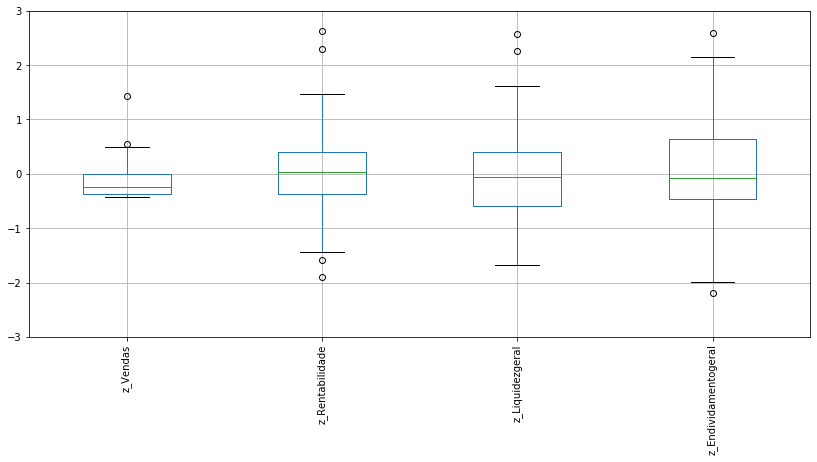

In [89]:
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)

In [90]:
Z = linkage(df[z_variaveis], method='single', metric='sqeuclidean')

In [91]:
print ('Planejamento da Aglomeração\n')
print(Z)

Planejamento da Aglomeração

[[2.00000000e+01 3.20000000e+01 8.68142071e-02 2.00000000e+00]
 [2.30000000e+01 4.10000000e+01 1.03268850e-01 2.00000000e+00]
 [1.90000000e+01 4.40000000e+01 1.70559462e-01 2.00000000e+00]
 [3.90000000e+01 5.00000000e+01 1.82933906e-01 3.00000000e+00]
 [3.00000000e+01 5.30000000e+01 1.97909405e-01 4.00000000e+00]
 [9.00000000e+00 1.00000000e+01 1.98882172e-01 2.00000000e+00]
 [5.10000000e+01 5.40000000e+01 2.08566326e-01 6.00000000e+00]
 [4.90000000e+01 5.60000000e+01 2.29484535e-01 7.00000000e+00]
 [1.50000000e+01 5.70000000e+01 2.32317534e-01 8.00000000e+00]
 [1.40000000e+01 5.80000000e+01 2.69812658e-01 9.00000000e+00]
 [2.60000000e+01 5.20000000e+01 2.80848392e-01 3.00000000e+00]
 [5.50000000e+01 6.00000000e+01 3.20509708e-01 5.00000000e+00]
 [2.20000000e+01 3.80000000e+01 3.41269507e-01 2.00000000e+00]
 [5.90000000e+01 6.10000000e+01 3.59704656e-01 1.40000000e+01]
 [3.30000000e+01 3.50000000e+01 3.73179601e-01 2.00000000e+00]
 [2.00000000e+00 6.3000000

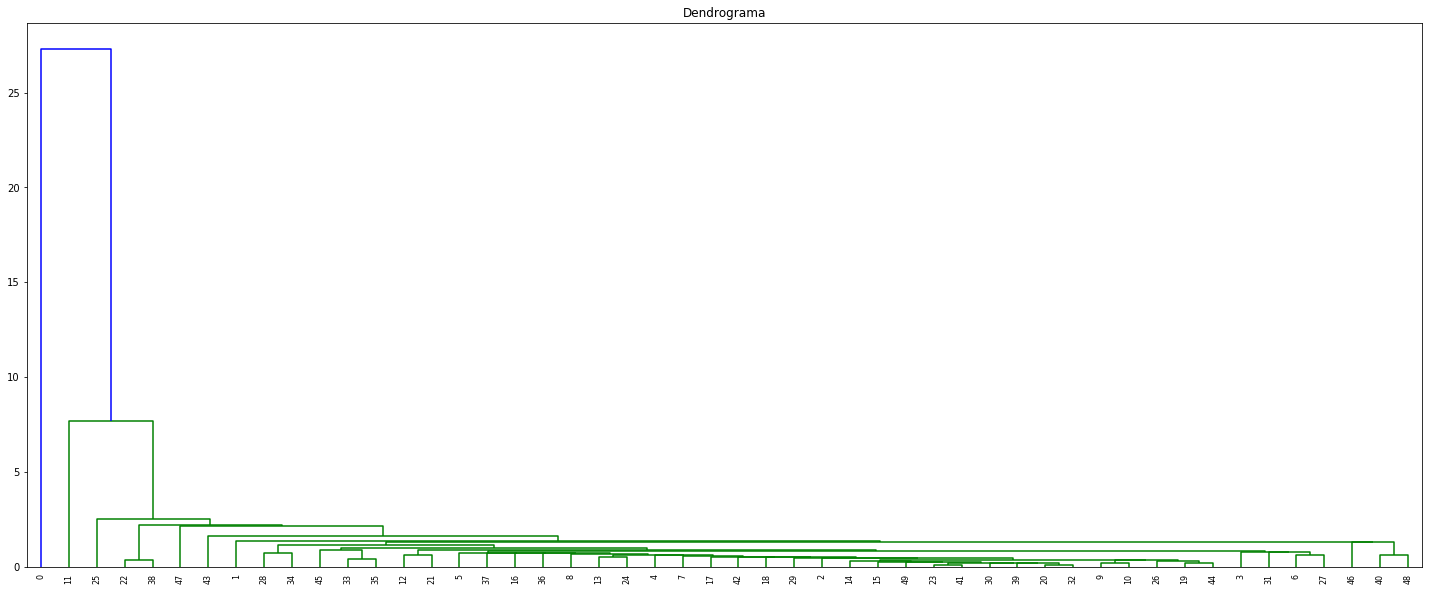

In [92]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.title("Dendrograma") 
plt.show()

In [93]:
parada = pd.DataFrame(Z, columns=["c1", "c2", "dist", "n"])

In [94]:
# As primeiras 5 linhas do Daframe Criado
parada.head()

,c1,c2,dist,n
0,20.0,32.0,0.086814,2.0
1,23.0,41.0,0.103269,2.0
2,19.0,44.0,0.170559,2.0
3,39.0,50.0,0.182934,3.0
4,30.0,53.0,0.197909,4.0


In [95]:
parada['heterogeneidade'] = ((parada['dist'].shift(-1) - parada['dist']) / parada['dist']) * 100

In [96]:
parada.tail(10)

,c1,c2,dist,n,heterogeneidade
39,81.0,88.0,1.158212,39.0,10.804402
40,46.0,76.0,1.283350,3.0,0.664178
41,89.0,90.0,1.291874,42.0,6.003593
42,1.0,91.0,1.369433,43.0,19.574719
43,43.0,92.0,1.637495,44.0,29.333170
44,47.0,93.0,2.117825,45.0,4.401822
45,62.0,94.0,2.211048,47.0,13.752056
46,25.0,95.0,2.515112,48.0,204.860828
47,11.0,96.0,7.667591,49.0,256.165346
48,0.0,97.0,27.309304,50.0,NaN


In [97]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='sqeuclidean', linkage='single')  

In [98]:
cluster.fit_predict(df[z_variaveis])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
cluster.fit(df[z_variaveis])

AgglomerativeClustering(affinity='sqeuclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [100]:
cluster.get_params()

{'affinity': 'sqeuclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'single',
 'memory': None,
 'n_clusters': 2,
 'pooling_func': 'deprecated'}

In [101]:
cluster.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [102]:
cluster.n_leaves_

50

In [103]:
cluster.n_clusters

2

In [104]:
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo6'])], axis=1)

In [105]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,grupo6
0,PETROBRAS,47855158,21.938,1.0756,52.484,6.580699,0.489497,0.667019,-0.284352,1
1,PETROBRAS DISTRIBUIDORA,13531695,10.528,1.2175,54.189,1.431147,-0.306732,1.044635,-0.162533,0
2,TELEMAR,7696136,7.836,0.4218,55.977,0.555638,-0.494589,-1.072832,-0.034785,0


In [106]:
df.groupby('grupo6').count()['Empresa']

grupo6
0    49
1     1
Name: Empresa, dtype: int64

In [107]:
df.groupby('grupo6').count()['Empresa']

grupo6
0    49
1     1
Name: Empresa, dtype: int64

In [108]:
grupo_3 = df.groupby('grupo6').mean()[z_variaveis].round(2)

In [109]:
grupo_3

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
grupo6,,,,
0,-0.13,-0.01,-0.01,0.01
1,6.58,0.49,0.67,-0.28


In [110]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,grupo6
0,PETROBRAS,47855158,21.938,1.0756,52.484,6.580699,0.489497,0.667019,-0.284352,1
1,PETROBRAS DISTRIBUIDORA,13531695,10.528,1.2175,54.189,1.431147,-0.306732,1.044635,-0.162533,0
2,TELEMAR,7696136,7.836,0.4218,55.977,0.555638,-0.494589,-1.072832,-0.034785,0


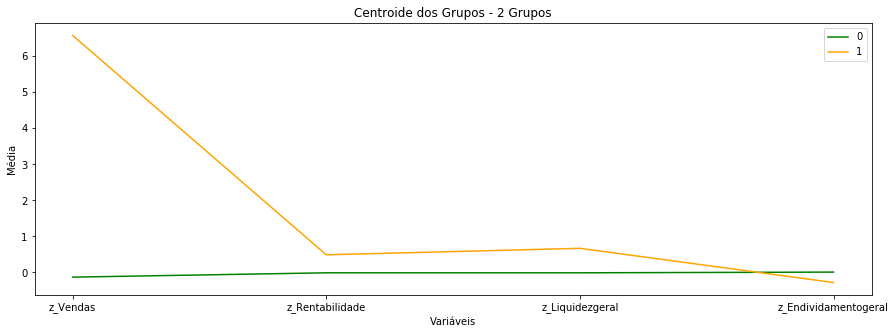

In [112]:
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_3.loc[0], color='g')
plt.plot(z_variaveis, grupo_3.loc[1], color='orange')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 2 Grupos')
plt.legend(["0","1","2"], loc=1)
plt.show()

In [113]:
# Execução do algoritmo kmeans para 4 grupos e a semente dos centros é o centróide obtido na análise hierárquica
kmeans = KMeans(n_clusters=2, init=grupo_3, n_init=1).fit(df[z_variaveis])

In [114]:
kmeans

KMeans(algorithm='auto', copy_x=True,
       init=        z_Vendas  z_Rentabilidade  z_Liquidezgeral  z_Endividamentogeral
grupo6                                                                  
0          -0.13            -0.01            -0.01                  0.01
1           6.58             0.49             0.67                 -0.28,
       max_iter=300, n_clusters=2, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [115]:
y_kmeans = kmeans.predict(df[z_variaveis])

In [116]:
y_kmeans

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [117]:
kmeans.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [118]:
df['kmeans'] = kmeans.labels_

In [119]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,grupo6,kmeans
0,PETROBRAS,47855158,21.938,1.0756,52.484,6.580699,0.489497,0.667019,-0.284352,1,1
1,PETROBRAS DISTRIBUIDORA,13531695,10.528,1.2175,54.189,1.431147,-0.306732,1.044635,-0.162533,0,0
2,TELEMAR,7696136,7.836,0.4218,55.977,0.555638,-0.494589,-1.072832,-0.034785,0,0


In [120]:
lens = []
for i in np.sort(list(df['kmeans'].unique())):
    lens.append(len(df.loc[df['kmeans'] == i,:]))
    print("Cluster ", i, ": ", lens[i])

Cluster  0 :  49
Cluster  1 :  1


In [122]:
df.groupby('kmeans').count()['Empresa']

kmeans
0    49
1     1
Name: Empresa, dtype: int64

In [123]:
k_means_centro = df.groupby('kmeans').mean()[z_variaveis].round(2)

In [124]:
k_means_centro

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
kmeans,,,,
0,-0.13,-0.01,-0.01,0.01
1,6.58,0.49,0.67,-0.28


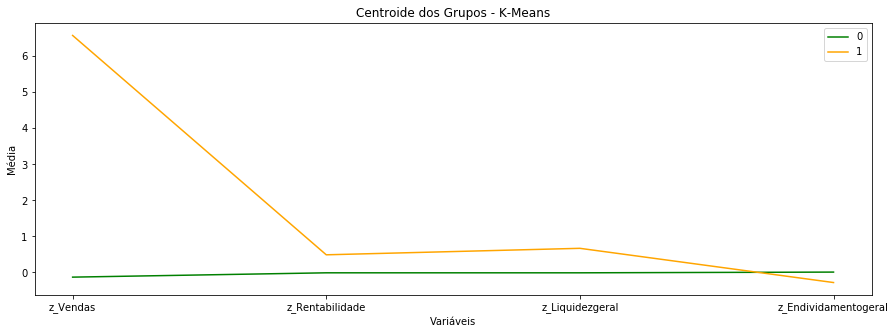

In [125]:
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, k_means_centro.loc[0], color='g')
plt.plot(z_variaveis, k_means_centro.loc[1], color='orange')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - K-Means')
plt.legend(["0","1",], loc=1)
plt.show()

In [126]:
clusters_labels = pd.DataFrame(kmeans.labels_)
clusters_labels = clusters_labels.drop_duplicates().sort_values(0)

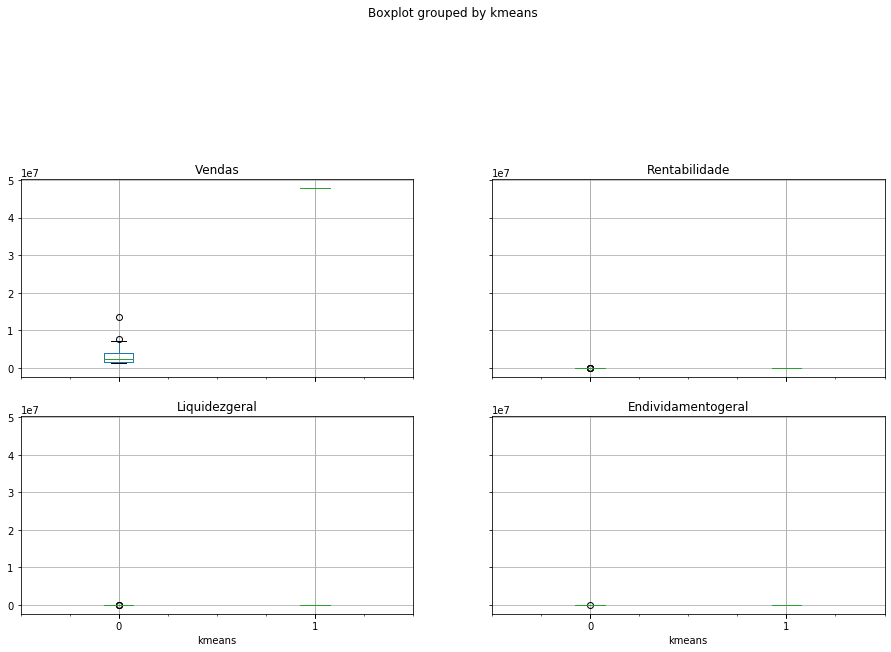

In [128]:
boxplot = df.boxplot(column=variaveis, by='kmeans', layout=(7,2), figsize=[15,30], showfliers=True)